# Установка библиотек и импорты

In [ ]:
pip install openpyxl pandas numpy sklearn matplotlib seaborn tensorflow-gpu

In [49]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from pandas.plotting import scatter_matrix
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Lasso
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
import pickle

# Загрузка датасета

### Загрузка x_bp

In [50]:
x_bp = pd.read_excel(io = "./hw_data_composite/X_bp.xlsx")
x_bp = x_bp.astype({'Unnamed: 0':'int'})
x_bp

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1,1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2,2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3,3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4,4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...,...
1018,1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019,1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020,1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021,1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


### Загрузка x_nup

In [51]:
x_nup = pd.read_excel(io = "./hw_data_composite/X_nup.xlsx")
x_nup = x_nup.astype({'Unnamed: 0':'int','Угол нашивки, град':'int'})
x_nup

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,0,4.000000,57.000000
1,1,0,4.000000,60.000000
2,2,0,4.000000,70.000000
3,3,0,5.000000,47.000000
4,4,0,5.000000,57.000000
...,...,...,...,...
1035,1035,90,8.088111,47.759177
1036,1036,90,7.619138,66.931932
1037,1037,90,9.800926,72.858286
1038,1038,90,10.079859,65.519479


### Объединение таблиц и удаление столбца-индекса

In [52]:
dataset = pd.merge(x_bp, x_nup, how='inner', on='Unnamed: 0')
dataset = dataset.drop(labels = 'Unnamed: 0', axis = 1)
dataset

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


# Разведочный анализ

### Медианы по столбцам

In [53]:
dataset.median()

Соотношение матрица-наполнитель            2.906878
Плотность, кг/м3                        1977.621657
модуль упругости, ГПа                    739.664328
Количество отвердителя, м.%              110.564840
Содержание эпоксидных групп,%_2           22.230744
Температура вспышки, С_2                 285.896812
Поверхностная плотность, г/м2            451.864365
Модуль упругости при растяжении, ГПа      73.268805
Прочность при растяжении, МПа           2459.524526
Потребление смолы, г/м2                  219.198882
Угол нашивки, град                         0.000000
Шаг нашивки                                6.916144
Плотность нашивки                         57.341920
dtype: float64

### Средние значения по столбцам

In [54]:
dataset.mean()

Соотношение матрица-наполнитель            2.930366
Плотность, кг/м3                        1975.734888
модуль упругости, ГПа                    739.923233
Количество отвердителя, м.%              110.570769
Содержание эпоксидных групп,%_2           22.244390
Температура вспышки, С_2                 285.882151
Поверхностная плотность, г/м2            482.731833
Модуль упругости при растяжении, ГПа      73.328571
Прочность при растяжении, МПа           2466.922843
Потребление смолы, г/м2                  218.423144
Угол нашивки, град                        44.252199
Шаг нашивки                                6.899222
Плотность нашивки                         57.153929
dtype: float64

### Убираю угол нашивки для отрисовки графиков (неинформативный параметр, т.к. принимает всего  2 значения)

In [55]:
ds_without_angles = dataset.drop(axis = 1, labels = 'Угол нашивки, град')

### Гистограммы распределения переменных

array([[<AxesSubplot:title={'center':'Соотношение матрица-наполнитель'}>,
        <AxesSubplot:title={'center':'Плотность, кг/м3'}>,
        <AxesSubplot:title={'center':'модуль упругости, ГПа'}>],
       [<AxesSubplot:title={'center':'Количество отвердителя, м.%'}>,
        <AxesSubplot:title={'center':'Содержание эпоксидных групп,%_2'}>,
        <AxesSubplot:title={'center':'Температура вспышки, С_2'}>],
       [<AxesSubplot:title={'center':'Поверхностная плотность, г/м2'}>,
        <AxesSubplot:title={'center':'Модуль упругости при растяжении, ГПа'}>,
        <AxesSubplot:title={'center':'Прочность при растяжении, МПа'}>],
       [<AxesSubplot:title={'center':'Потребление смолы, г/м2'}>,
        <AxesSubplot:title={'center':'Шаг нашивки'}>,
        <AxesSubplot:title={'center':'Плотность нашивки'}>]], dtype=object)

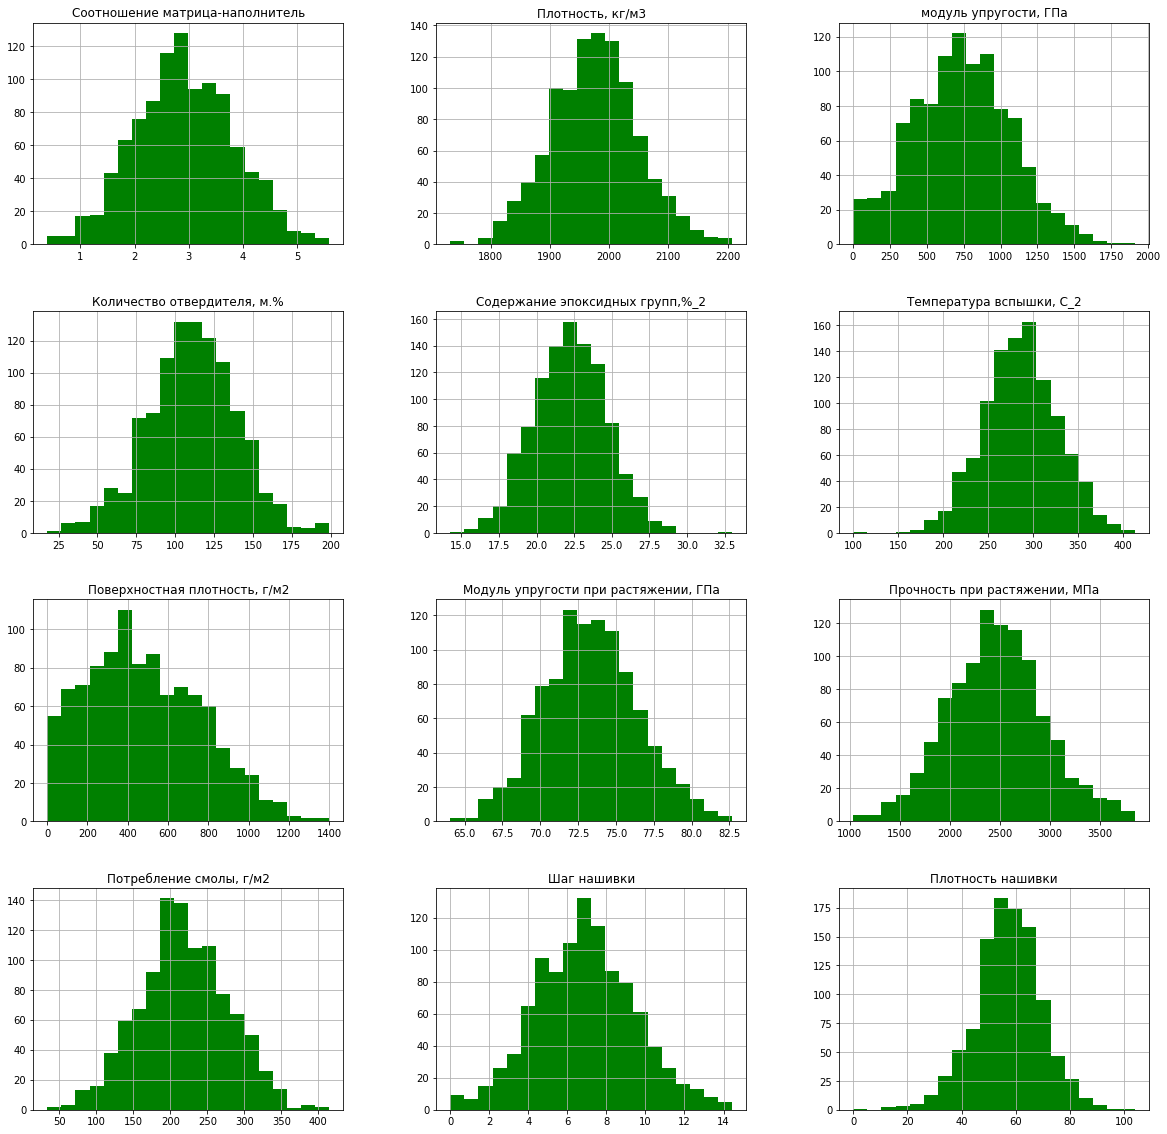

In [56]:
ds_without_angles.hist(figsize = (20, 20), bins = 20, color = 'green')

### Диаграммы размаха (ящики с усами) по каждой переменной

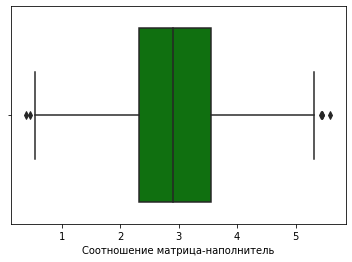

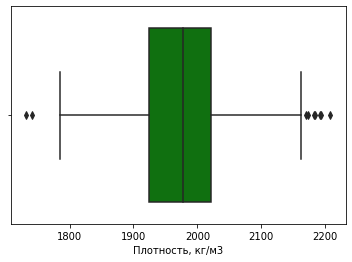

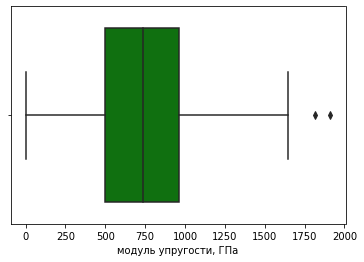

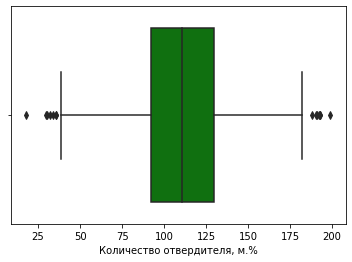

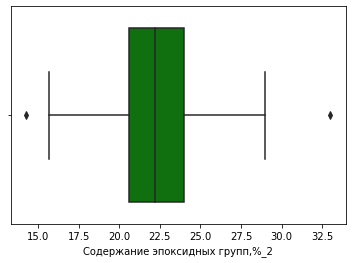

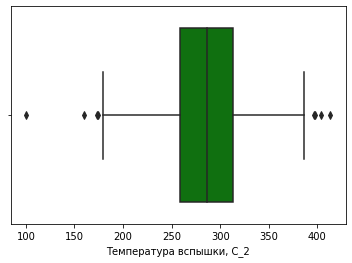

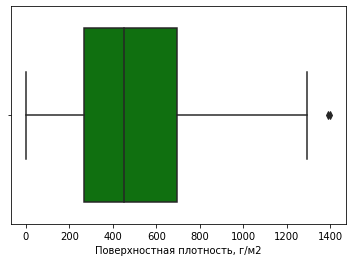

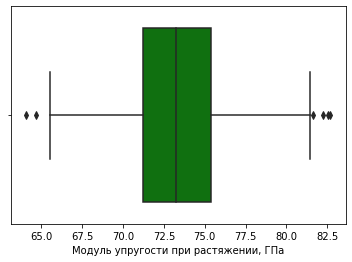

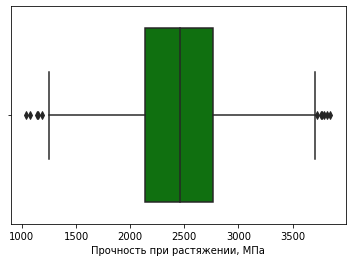

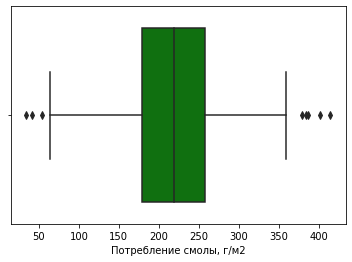

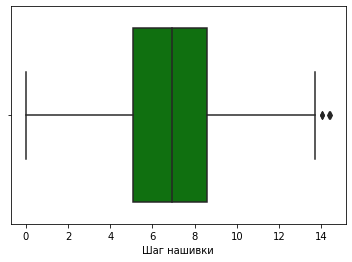

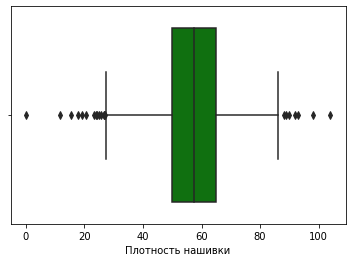

In [57]:
for col in ds_without_angles.columns:
    sns.boxplot(x = dataset[col], color = 'green')
    plt.show()

### Попарные диаграммы рассеяния

array([[<AxesSubplot:xlabel='Соотношение матрица-наполнитель', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Плотность, кг/м3', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='модуль упругости, ГПа', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Количество отвердителя, м.%', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Содержание эпоксидных групп,%_2', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Температура вспышки, С_2', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Поверхностная плотность, г/м2', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Модуль упругости при растяжении, ГПа', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Прочность при растяжении, МПа', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Потребление смолы, г/м2', ylabel='Соотношение матриц

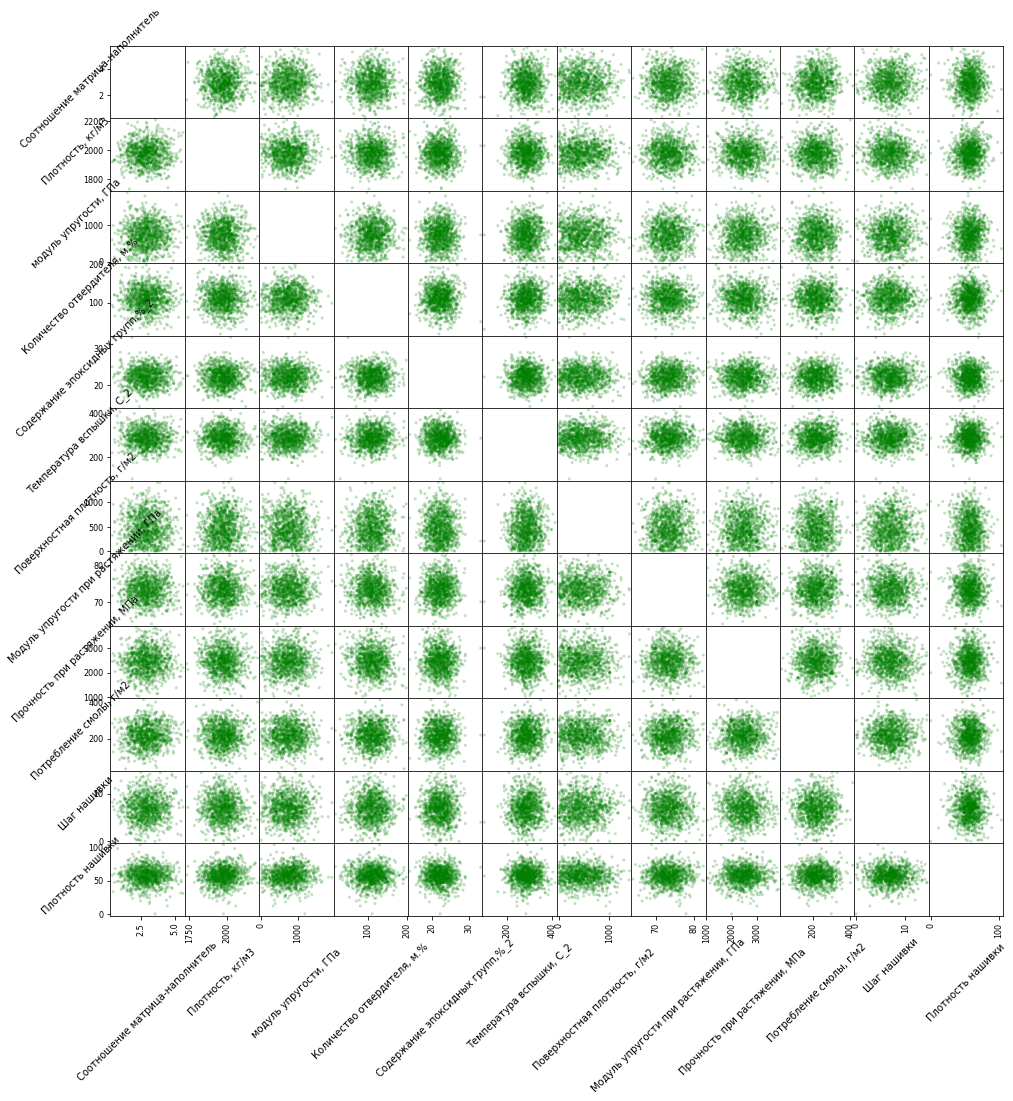

In [58]:
pair_diagram = scatter_matrix(ds_without_angles, figsize = (16, 16), alpha = 0.25, color = 'green', diagonal = None)
for ax in pair_diagram.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 45)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 45)
pair_diagram

# Предобработка данных

### Проверка наличия пропусков

In [59]:
dataset.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

### Поиск выбросов с помощью многомерного LocalOutlierFactor

In [60]:
lof = LocalOutlierFactor(n_neighbors = 300)
lof_pred = lof.fit_predict(ds_without_angles)
outlier_indexes = []
for i in range(len(lof_pred)):
    if lof_pred[i] == -1:
        outlier_indexes.append(i)
print('Кол-во выбросов: ' + str(len(outlier_indexes)))
dataset.loc[outlier_indexes]

Кол-во выбросов: 27


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
11,2.877358,1990.000000,1628.000000,129.000000,21.250000,300.000000,1010.000000,78.000000,2000.000000,300.000000,0,9.000000,47.000000
24,2.499918,1942.595777,901.519947,146.252208,23.081757,351.231874,864.725484,76.178075,3705.672523,226.222760,90,5.000000,47.000000
37,5.098993,1977.339047,1572.096042,132.343060,25.397001,286.556431,690.364836,72.341640,1386.578973,271.901394,90,10.000000,57.000000
77,2.965812,1952.017898,105.154467,104.486677,23.898728,308.473989,808.806264,75.825484,1400.357932,300.499628,0,11.644048,34.929572
94,1.620930,2110.566437,124.133740,191.053004,21.590295,280.120468,4.099043,72.680412,1461.448845,171.988605,0,7.388167,45.459778
99,3.952834,1931.687894,348.354645,108.403571,22.951690,208.041941,97.545358,71.807955,3725.190760,134.392555,0,4.402248,48.959084
106,2.334566,2020.976475,1013.513596,109.505135,24.330905,266.258622,719.870002,68.166534,3773.151949,264.835584,0,7.363599,69.172337
113,3.108043,1879.000705,1106.825749,157.076488,17.089228,305.658635,1227.243097,72.625213,1529.604423,208.945212,0,9.453269,52.391669
172,3.441706,1839.864649,935.511792,99.079859,20.715839,330.371637,556.153263,76.632138,3791.072810,284.852950,0,7.208147,35.768811
185,2.152055,1938.282144,1065.625743,148.104233,19.093392,234.856713,865.629036,72.299462,3848.436732,143.123640,0,5.783165,36.911051


### Удаление выбросов из датасета

In [61]:
dataset.drop(outlier_indexes, inplace = True, errors='ignore')
ds_without_angles.drop(outlier_indexes, inplace = True, errors='ignore')
dataset

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


### Разделение датасета на входные и выходные параметры

In [62]:
dataset_inputs = dataset.drop(axis = 1,
                              labels = ['Соотношение матрица-наполнитель',
                                        'Модуль упругости при растяжении, ГПа',
                                        'Прочность при растяжении, МПа'])
dataset_output_mod_up = pd.DataFrame(dataset['Модуль упругости при растяжении, ГПа'])
dataset_output_mat_nap = pd.DataFrame(dataset['Соотношение матрица-наполнитель'])
dataset_output_str = pd.DataFrame(dataset['Прочность при растяжении, МПа'])

### Метод для scaling'а

In [63]:
def scale(scaler, df):
    scaler.fit(df)
    df_scaled = pd.DataFrame(scaler.transform(df.values))
    df_scaled.columns = df.columns
    return scaler, df_scaled

### Нормализация

In [64]:
min_max_scaler_inputs, dataset_inputs_normalized = scale(scaler = preprocessing.MinMaxScaler(),
                                                         df = dataset_inputs)
dataset_inputs_normalized

/home/svt/anaconda3/envs/testEnv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.626533,0.447061,0.067654,0.427467,0.000000,0.150598,0.488979,0.0,0.276998,0.548135
1,0.626533,0.447061,0.178021,0.506535,0.589311,0.150598,0.488979,0.0,0.276998,0.576985
2,0.626533,0.447061,0.177469,1.000000,0.589311,0.150598,0.488979,0.0,0.276998,0.673149
3,0.626533,0.447061,0.613972,0.373167,0.638420,0.150598,0.488979,0.0,0.346248,0.451971
4,0.626533,0.455721,0.519387,0.427467,0.589311,0.150598,0.488979,0.0,0.346248,0.548135
...,...,...,...,...,...,...,...,...,...,...
991,0.462855,0.552781,0.382158,0.313057,0.717503,0.150022,0.239516,1.0,0.628535,0.452161
992,0.668737,0.268550,0.707685,0.285131,0.492271,0.251762,0.220404,1.0,0.731664,0.516890
993,0.505470,0.251612,0.512067,0.517605,0.473781,0.531878,0.532590,1.0,0.288158,0.650355
994,0.703842,0.448724,0.682389,0.266309,0.561107,0.460911,0.428909,1.0,0.437186,0.560262


In [65]:
min_max_scaler_output_mod_up, dataset_output_mod_up_normalized = scale(scaler = preprocessing.MinMaxScaler(),
                                                                       df = dataset_output_mod_up)
min_max_scaler_output_mat_nap, dataset_output_mat_nap_normalized = scale(scaler = preprocessing.MinMaxScaler(),
                                                                         df = dataset_output_mat_nap)
min_max_scaler_output_str, dataset_output_str_normalized = scale(scaler = preprocessing.MinMaxScaler(),
                                                      df = dataset_output_str)

/home/svt/anaconda3/envs/testEnv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/svt/anaconda3/envs/testEnv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/svt/anaconda3/envs/testEnv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


### Стандартизация

In [66]:
standard_scaler_inputs, dataset_inputs_standartized = scale(scaler = preprocessing.StandardScaler(),
                                                         df = dataset_inputs)
dataset_inputs_standartized

/home/svt/anaconda3/envs/testEnv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.739690,0.002234,-2.838442,0.008233,-4.560620,-0.974119,0.030851,-0.986041,-1.131073,-0.020839
1,0.739690,0.002234,-2.132924,0.625314,-0.032437,-0.974119,0.030851,-0.986041,-1.131073,0.221778
2,0.739690,0.002234,-2.136451,4.476492,-0.032437,-0.974119,0.030851,-0.986041,-1.131073,1.030501
3,0.739690,0.002234,0.653875,-0.415545,0.344912,-0.974119,0.030851,-0.986041,-0.739177,-0.829562
4,0.739690,0.046680,0.049246,0.008233,-0.032437,-0.974119,0.030851,-0.986041,-0.739177,-0.020839
...,...,...,...,...,...,...,...,...,...,...
991,-0.316609,0.544814,-0.827990,-0.884660,0.952574,-0.977005,-1.566497,1.014156,0.858340,-0.827963
992,1.012050,-0.913927,1.252930,-1.102608,-0.778077,-0.467445,-1.688874,1.014156,1.441964,-0.283610
993,-0.041594,-1.000856,0.002451,0.711706,-0.920150,0.935505,0.310103,1.014156,-1.067917,0.838808
994,1.238605,0.010768,1.091225,-1.249504,-0.249152,0.580069,-0.353786,1.014156,-0.224539,0.081147


In [67]:
standard_scaler_output_mod_up, dataset_output_mod_up_standartized = scale(scaler = preprocessing.StandardScaler(),
                                                                       df = dataset_output_mod_up)
standard_scaler_output_mat_nap, dataset_output_mat_nap_standartized = scale(scaler = preprocessing.StandardScaler(),
                                                                         df = dataset_output_mat_nap)
standard_scaler_output_str, dataset_output_str_standartized = scale(scaler = preprocessing.StandardScaler(),
                                                      df = dataset_output_str)

/home/svt/anaconda3/envs/testEnv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/svt/anaconda3/envs/testEnv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/svt/anaconda3/envs/testEnv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Построение моделей

### Подбор гиперпараметров по сетке с кросс валидацией по метрике R2 и обучение на лучших параметрах

### Ридж-регрессия 

### Прогноз модуля упругости при растяжении на нормализованном датасете

In [68]:
def calculate_ridge(x, y, alphas = np.logspace(-10, -0, 11),
                    n_splits = 10, scoring = None):
    ridge_results = []
    for alpha in alphas:
        ridge_result = cross_val_score(
            Ridge(alpha), x, y, cv=KFold(n_splits, shuffle = True), n_jobs = -1, scoring = scoring)
        ridge_results.append([alpha, ridge_result.mean()])
    ridge_df = pd.DataFrame(ridge_results, columns = ['alpha','score'])
    return ridge_df

In [69]:
def make_ridge_model(ridge_cross_val_res, dataset_inputs, dataset_output,
                     output_scaler, test_size=0.3):
    alpha_best = ridge_cross_val_res.sort_values(by = 'score',ascending = False)['alpha'].iloc[0]
    print('Best alpha: ' + str(alpha_best))
    
    ridge_model = Ridge(alpha_best)
    X_train, X_test, y_train, y_test = train_test_split(
        dataset_inputs_normalized, dataset_output_mod_up_normalized, test_size=test_size)
    ridge_model.fit(X_train, y_train)
    
    comparison_df = pd.DataFrame(np.column_stack(
    [output_scaler.inverse_transform(ridge_model.predict(X_test)),
     output_scaler.inverse_transform(y_test)]), columns=['Предсказанные данные', 'Тестовые данные'])
    
    print(comparison_df)
    print('Средняя абсолютная ошибка: ' + str(mean_absolute_error(comparison_df['Тестовые данные'], comparison_df['Предсказанные данные'])))

    return ridge_model

### Прогноз модуля упругости при растяжении на нормализованном датасете

In [70]:
ridge_mod_up_cross_val_res_normalized = calculate_ridge(dataset_inputs_normalized, dataset_output_mod_up_normalized)
ridge_mod_up_cross_val_res_normalized

,alpha,score
0,1.000000e-10,-0.025006
1,1.000000e-09,-0.022480
2,1.000000e-08,-0.024686
3,1.000000e-07,-0.011303
4,1.000000e-06,-0.030999
5,1.000000e-05,-0.016300
6,1.000000e-04,-0.014845
7,1.000000e-03,-0.017604
8,1.000000e-02,-0.021426
9,1.000000e-01,-0.029344


In [71]:
ridge_mod_up_best_normalized = make_ridge_model(ridge_mod_up_cross_val_res_normalized, dataset_inputs_normalized,
                                                dataset_output_mod_up_normalized, min_max_scaler_output_mod_up)

Best alpha: 1e-07
     Предсказанные данные  Тестовые данные
0               73.550271        71.785382
1               73.584275        73.493890
2               73.227596        71.729136
3               74.160044        70.280327
4               72.878980        69.204642
..                    ...              ...
294             73.611322        74.064903
295             73.489348        73.385782
296             74.948475        69.016483
297             72.985141        70.349251
298             72.480721        71.221147

[299 rows x 2 columns]
Средняя абсолютная ошибка: 2.5275812517472294


### Прогноз прочности при растяжении на нормализованном датасете

In [72]:
ridge_str_cross_val_res_normalized = calculate_ridge(dataset_inputs_normalized,dataset_output_str_normalized)
ridge_str_cross_val_res_normalized

,alpha,score
0,1.000000e-10,-0.006842
1,1.000000e-09,-0.004160
2,1.000000e-08,-0.012599
3,1.000000e-07,-0.022769
4,1.000000e-06,-0.014508
5,1.000000e-05,-0.011088
6,1.000000e-04,-0.013389
7,1.000000e-03,-0.021028
8,1.000000e-02,-0.006656
9,1.000000e-01,-0.013229


In [73]:
ridge_str_best_normalized = make_ridge_model(ridge_str_cross_val_res_normalized, dataset_inputs_normalized,
                                             dataset_output_str_normalized, min_max_scaler_output_str)

Best alpha: 1e-09
     Предсказанные данные  Тестовые данные
0             2505.705074      1645.762670
1             2512.303412      2145.048329
2             2507.388920      2608.051839
3             2446.923123      2290.750352
4             2338.782696      2407.569430
..                    ...              ...
294           2358.945605      2286.116826
295           2428.636968      1880.574262
296           2527.093277      2873.795640
297           2438.669727      1956.377717
298           2537.602817      2014.979099

[299 rows x 2 columns]
Средняя абсолютная ошибка: 324.6265900249687


### Прогноз модуля упругости при растяжении на стандартизированном датасете

In [74]:
ridge_mod_up_cross_val_res_standartized = calculate_ridge(dataset_inputs_standartized, dataset_output_mod_up_standartized)
ridge_mod_up_cross_val_res_standartized

,alpha,score
0,1.000000e-10,-0.024480
1,1.000000e-09,-0.017435
2,1.000000e-08,-0.012564
3,1.000000e-07,-0.022232
4,1.000000e-06,-0.012595
5,1.000000e-05,-0.022387
6,1.000000e-04,-0.020044
7,1.000000e-03,-0.024375
8,1.000000e-02,-0.023601
9,1.000000e-01,-0.017291


In [75]:
ridge_mod_up_best_standartized = make_ridge_model(ridge_mod_up_cross_val_res_standartized, dataset_inputs_standartized,
                                                  dataset_output_mod_up_standartized, min_max_scaler_output_mod_up)

Best alpha: 1e-08
     Предсказанные данные  Тестовые данные
0               73.284894        70.646922
1               74.241406        79.893823
2               73.061795        73.219286
3               73.417750        70.801749
4               73.465352        69.102559
..                    ...              ...
294             72.706912        71.001808
295             72.339689        72.707678
296             73.606241        76.206852
297             73.684370        72.250975
298             73.433063        65.553336

[299 rows x 2 columns]
Средняя абсолютная ошибка: 2.527276620320635


### Прогноз прочности при растяжении на стандартизированном датасете

In [76]:
ridge_str_cross_val_res_standartized = calculate_ridge(dataset_inputs_standartized, dataset_output_str_standartized)
ridge_str_cross_val_res_standartized

,alpha,score
0,1.000000e-10,-0.023388
1,1.000000e-09,-0.013723
2,1.000000e-08,-0.018260
3,1.000000e-07,-0.017449
4,1.000000e-06,-0.019626
5,1.000000e-05,-0.015872
6,1.000000e-04,-0.008082
7,1.000000e-03,-0.021001
8,1.000000e-02,-0.013661
9,1.000000e-01,-0.012935


In [77]:
ridge_str_best_standartized = make_ridge_model(ridge_str_cross_val_res_standartized, dataset_inputs_standartized,
                                               dataset_output_str_standartized, min_max_scaler_output_str)

Best alpha: 0.0001
     Предсказанные данные  Тестовые данные
0             2504.753351      2337.900875
1             2466.498205      2779.123774
2             2377.373754      2577.865222
3             2376.415988      2020.127261
4             2422.317085      2865.272778
..                    ...              ...
294           2438.827197      2367.684728
295           2467.438164      3189.819222
296           2383.233234      2863.099257
297           2475.939684      3213.136132
298           2354.743856      2045.211226

[299 rows x 2 columns]
Средняя абсолютная ошибка: 345.6393441059273


### Линейная регрессия с полиномиальными параметрами

In [78]:
def make_linear_model(dataset_inputs, dataset_output,
                            output_scaler, test_size=0.3):  
    linear_model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(
        dataset_inputs, dataset_output, test_size=test_size)
    poly_x_train = PolynomialFeatures().fit_transform(X_train)
    poly_x_test = PolynomialFeatures().fit_transform(X_test)
    linear_model.fit(poly_x_train, y_train)
    
    comparison_df = pd.DataFrame(np.column_stack(
    [output_scaler.inverse_transform(pd.DataFrame(linear_model.predict(poly_x_test))),
     output_scaler.inverse_transform(y_test)]), columns=['Предсказанные данные', 'Тестовые данные'])
    
    print(comparison_df)
    print('Средняя абсолютная ошибка: ' + str(mean_absolute_error(comparison_df['Тестовые данные'], comparison_df['Предсказанные данные'])))

    return linear_model

### Прогноз модуля упругости при растяжении на нормализованном датасете

In [79]:
linear_mod_up_normalized = make_linear_model(dataset_inputs_normalized,
                                             dataset_output_mod_up_normalized,
                                             min_max_scaler_output_mod_up)

     Предсказанные данные  Тестовые данные
0               73.960608        71.335982
1               73.389326        69.175075
2               72.708195        72.087795
3               73.176833        74.414663
4               74.039626        70.134387
..                    ...              ...
294             73.549899        71.744963
295             73.427668        67.494639
296             72.426852        76.823842
297             73.235325        74.769351
298             72.482256        73.797618

[299 rows x 2 columns]
Средняя абсолютная ошибка: 2.5798877196344465


### Прогноз прочности при растяжении на нормализованном датасете

In [80]:
linear_str_normalized = make_linear_model(dataset_inputs_normalized,
                                          dataset_output_str_normalized,
                                          min_max_scaler_output_str)

     Предсказанные данные  Тестовые данные
0             2762.168536      2437.289279
1             2484.991612      3329.337538
2             2444.990254      2076.460084
3             2400.985404      2078.194365
4             2444.826426      2521.113938
..                    ...              ...
294           2431.392200      1950.165065
295           2766.165878      3000.000000
296           2388.173413      1573.840762
297           2556.123450      2259.784269
298           2707.637349      2269.248921

[299 rows x 2 columns]
Средняя абсолютная ошибка: 378.59391548770765


### Прогноз модуля упругости при растяжении на стандартизированном датасете

In [81]:
linear_mod_up_standartized = make_linear_model(dataset_inputs_standartized,
                                               dataset_output_mod_up_standartized,
                                               standard_scaler_output_mod_up)

     Предсказанные данные  Тестовые данные
0               72.811907        75.151340
1               74.515507        71.956038
2               74.224300        71.881227
3               73.370161        72.043871
4               73.221263        67.265648
..                    ...              ...
294             73.894204        73.264735
295             73.363166        66.927205
296             75.131438        74.737493
297             72.192060        71.568204
298             73.417573        73.690890

[299 rows x 2 columns]
Средняя абсолютная ошибка: 2.5125602898695734


### Прогноз прочности при растяжении на стандартизированном датасете

In [82]:
linear_str_standartized  = make_linear_model(dataset_inputs_standartized,
                                             dataset_output_str_standartized,
                                             standard_scaler_output_str)

     Предсказанные данные  Тестовые данные
0             2302.337772      2560.561028
1             2591.309474      2259.784269
2             2089.739798      1399.118555
3             2538.267831      3204.586834
4             2303.529758      2254.240098
..                    ...              ...
294           2543.309516      3063.025225
295           2418.755645      2605.464064
296           2646.118306      2306.283398
297           2447.697688      2201.923561
298           2646.806123      1978.776970

[299 rows x 2 columns]
Средняя абсолютная ошибка: 397.9171609051084


# Нейронная сеть

In [83]:
dataset_outputs_normalized = pd.DataFrame(np.column_stack([dataset_output_mod_up,
                                                           dataset_output_mat_nap,
                                                           dataset_output_str]),
                                          columns=[dataset_output_str.columns[0],
                                                   dataset_output_mat_nap.columns[0],
                                                   dataset_output_str.columns[0]])

In [84]:
min_max_scaler_outputs, dataset_outputs_normalized = scale(scaler = preprocessing.MinMaxScaler(),
                                                           df = dataset_outputs_normalized)

/home/svt/anaconda3/envs/testEnv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [85]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset_inputs_normalized, dataset_outputs_normalized, test_size=0.3)

In [86]:
model = keras.Sequential(
    [
        layers.Dense(1000, activation=layers.LeakyReLU(), name="hid_1"),
        layers.Dropout(0.9),
        layers.Dense(1000, activation=layers.LeakyReLU(), name="hid_2"),
        layers.Dense(1000, activation=layers.LeakyReLU(), name="hid_3"),
        layers.Dense(3, name="out_layer"),
    ]
)

In [87]:
model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001))
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3148
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1869
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1781
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1633
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1630
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1684
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1601
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1547
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1668
Epoch 10/100
22/22 [==============================] - 0s 3ms/step - loss: 0.1559
Epoch 11/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1545
Epoch 12/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1523
Epoch 13/100
22/22 [=================

In [88]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hid_1 (Dense)                (None, 1000)              11000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
hid_2 (Dense)                (None, 1000)              1001000   
_________________________________________________________________
hid_3 (Dense)                (None, 1000)              1001000   
_________________________________________________________________
out_layer (Dense)            (None, 3)                 3003      
Total params: 2,016,003
Trainable params: 2,016,003
Non-trainable params: 0
_________________________________________________________________


In [89]:
ns_result = pd.DataFrame(np.column_stack([min_max_scaler_outputs.inverse_transform(y_test),
                                          min_max_scaler_outputs.inverse_transform(model.predict(X_test))]),
                         columns = ['Модуль упругости','Матрица-наполнитель','Прочность',
                                    'Модуль упругости (пред.)','Матрица-наполнитель (пред.)','Прочность (пред.)'])

In [90]:
ns_result

,Модуль упругости,Матрица-наполнитель,Прочность,Модуль упругости (пред.),Матрица-наполнитель (пред.),Прочность (пред.)
0,69.748799,2.828984,2851.631846,73.219963,2.858340,2405.675049
1,73.873362,3.367147,2133.723172,73.271057,2.921306,2413.879395
2,71.215032,2.681941,3377.328044,72.797745,2.794041,2380.048828
3,71.597343,3.399960,2521.716179,72.881889,2.821766,2407.815674
4,73.389639,3.648693,2684.312583,72.893265,2.839983,2377.991455
...,...,...,...,...,...,...
294,69.489773,2.664389,2220.587445,72.975143,2.812323,2453.845703
295,70.701845,2.488009,2190.631608,72.985283,2.807813,2421.318604
296,73.493749,1.298667,2736.782713,73.134033,2.893181,2413.427490
297,73.682568,2.687789,2261.917472,72.971764,2.825685,2401.810791


In [91]:
print('Средняя абсолютная ошибка по прогнозу модуля упругости: '
      + str(mean_absolute_error(ns_result['Модуль упругости'],
                                ns_result['Модуль упругости (пред.)'])))
print('Средняя абсолютная ошибка по прогнозу соотношения матрица-наполнитель: '
      + str(mean_absolute_error(ns_result['Матрица-наполнитель'],
                                ns_result['Матрица-наполнитель (пред.)'])))
print('Средняя абсолютная ошибка по прогнозу прочности: '
      + str(mean_absolute_error(ns_result['Прочность'],
                                ns_result['Прочность (пред.)'])))

Средняя абсолютная ошибка по прогнозу модуля упругости: 2.45981350942125
Средняя абсолютная ошибка по прогнозу соотношения матрица-наполнитель: 0.6737452980478117
Средняя абсолютная ошибка по прогнозу прочности: 362.86131321067325


# Сохранение модели для создания приложения